In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lalsimulation as ls,lal

In [2]:
def make_waveform(m1=39.0, m2=34.0, 
                  spin1_z=0.0, spin2_z=0.0,
                  distance=500, phi_c=0.0,
                  f_start22=50.0, deltaT=1./4096.,
                  domega220=0.0, dtau220=0.0,
                  domega210=0.0, dtau210=0.0,
                  alphaNGR=0.0, pNGR=0.0):
    
    nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary

    m1 = m1*lal.MSUN_SI
    m2 = m2*lal.MSUN_SI

    distance *= 1e6*lal.PC_SI

    ######## param dict ###########
    paramdict = lal.CreateDict()
    ls.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
    ls.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
    ls.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
    ls.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
    ls.SimInspiralWaveformParamsInsertAlphaNGR(paramdict, alphaNGR)
    ls.SimInspiralWaveformParamsInsertPNGR(paramdict, pNGR)

    # Generate the waveform
    hp, hc =  ls.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                        phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, ls.SEOBNRv4HM_PA)
    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    return time_array, hp, hc


In [3]:
# GR
tGR, hpGR, hcGR = make_waveform()

In [4]:
# qEFT
domega220 = -0.2114
dtau220 = -0.6070
domega210 = -1.5263
dtau210 = 171.35
pNGR = 6.0

tnGR, hpnGR, hcnGR = make_waveform(
                  domega220=domega220, dtau220=dtau220,
                  domega210=domega210, dtau210=dtau210,
                  alphaNGR=84.0, pNGR=pNGR)

In [5]:
# EdGB
domega220 = 0.0107
dtau220 = 0.0044
domega210 = -0.2480
dtau210 = -1.101
pNGR = 4.0

tnGR1, hpnGR1, hcnGR1 = make_waveform(
                  domega220=domega220, dtau220=dtau220,
                  domega210=domega210, dtau210=dtau210,
                  alphaNGR=150.0, pNGR=pNGR);

In [6]:
#dCS

domega220 = 3.1964
dtau220 = 6.3619
domega210 = 41.198
dtau210 = 794.662

pNGR = 4.0

tnGR2, hpnGR2, hcnGR2 = make_waveform(
                  domega220=domega220, dtau220=dtau220,
                  domega210=domega210, dtau210=dtau210,
                  alphaNGR=35.0, pNGR=pNGR);

In [7]:
#cEFT

domega220 = -0.5812
dtau220 = 2.6469
domega210 = -3.8620
dtau210 = 265.12

pNGR = 4.0

tnGR3, hpnGR3, hcnGR3 = make_waveform(
                  domega220=domega220, dtau220=dtau220,
                  domega210=domega210, dtau210=dtau210,
                  alphaNGR=35.0, pNGR=pNGR);

/home/abhirup.ghosh/envs/lalsuite_hector_paper_parspec/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhirup.ghosh/envs/lalsuite_hector_paper_parspec/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhirup.ghosh/envs/lalsuite_hector_paper_parspec/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argum

(-0.01219482421875, 0.09326171875)

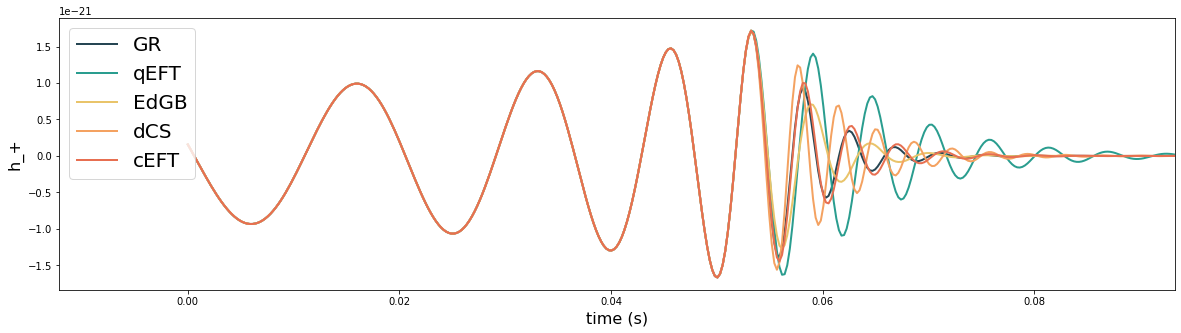

In [8]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(tGR, hpGR.data.data, ax=ax, label="GR", color="#264653", lw=2)
sns.lineplot(tnGR, hpnGR.data.data, ax=ax, label="qEFT", color="#2a9d8f", lw=2)
sns.lineplot(tnGR1, hpnGR1.data.data, ax=ax, label="EdGB", color="#e9c46a", lw=2)
sns.lineplot(tnGR2, hpnGR2.data.data, ax=ax, label="dCS", color="#f4a261", lw=2)
sns.lineplot(tnGR3, hpnGR3.data.data, ax=ax, label="cEFT", color="#e76f51", lw=2)
ax.legend(fontsize=20)
ax.set_xlabel("time (s)", fontsize=16)
ax.set_ylabel("h_+", fontsize=16)

plt.xlim(right=tnGR[np.where(hpGR.data.data==0.0)][0])

In [9]:
def comp_tau(alphaNGR = 85.0,
             z = 0.116747,
             Mf = 20.0,
             chif = 0.7):

    domega220 = -0.2114
    dtau220 = -0.6070
    domega210 = -1.5263
    dtau210 = 171.35
    pNGR = 6.0

    gammaNGR = (alphaNGR * 1.0e3 * lal.C_SI * lal.C_SI * (1. + z)/ lal.G_SI / Mf / lal.MSUN_SI)**pNGR

    tau = 11.2407 * (1. + gammaNGR*dtau220) + 0.2522*chif * (1. + gammaNGR*dtau210) + 0.6649*chif**2 + 0.5866*chif**3 + 0.5797*chif**4
    tau *= Mf * lal.MTSUN_SI

    tauGR = 11.2407 + 0.2522*chif + 0.6649*chif**2 + 0.5866*chif**3 + 0.5797*chif**4
    tauGR *= Mf * lal.MTSUN_SI

    return tau, tauGR

Text(0, 0.5, '$\\tau$ (sec)')

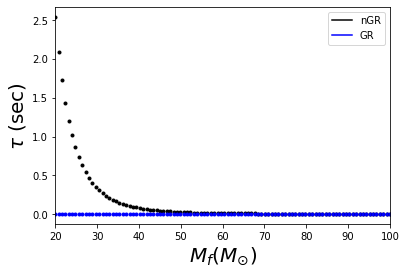

In [10]:
for Mf in np.linspace(20, 100, 100):
    tau, tauGR = comp_tau(Mf = Mf)
    plt.plot(Mf, tau, color='k', marker='.')
    plt.plot(Mf, tauGR, color='b', marker='.')

plt.plot(0, 0, color='k', label="nGR")
plt.plot(0, 0, color='b', label="GR" )    
plt.xlim([20, 100])
plt.legend(loc="best")    
plt.xlabel('$M_f (M_{\odot})$', fontsize=20) 
plt.ylabel('$\\tau$ (sec)', fontsize=20) 

Text(0, 0.5, '$\\tau$ (sec)')

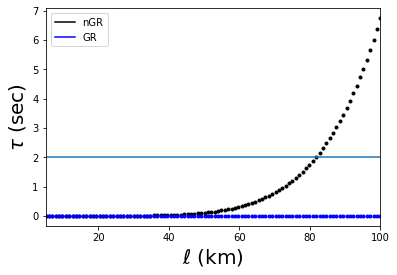

In [11]:
for alphaNGR in np.linspace(5, 100, 100):
    tau, tauGR = comp_tau(alphaNGR = alphaNGR)
    plt.plot(alphaNGR, tau, color='k', marker='.')
    plt.plot(alphaNGR, tauGR, color='b', marker='.' )
    
plt.plot(0, 0, color='k', label="nGR")
plt.plot(0, 0, color='b', label="GR" )    
plt.xlim([5, 100])
plt.axhline(y=2)
plt.legend(loc="best")    
plt.xlabel('$\ell$ (km)', fontsize=20) 
plt.ylabel('$\\tau$ (sec)', fontsize=20)     